In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats

In [3]:
df = pd.read_csv("Measurements.csv")

In [4]:
display(df.shape)
display(df.dtypes)

(55, 4)

time        float64
distance    float64
material     object
density     float64
dtype: object

In [5]:
df['speed'] = df['distance'] / df['time']

# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()

C:\Users\lukas\AppData\Local\Temp\ipykernel_12532\3803305941.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()


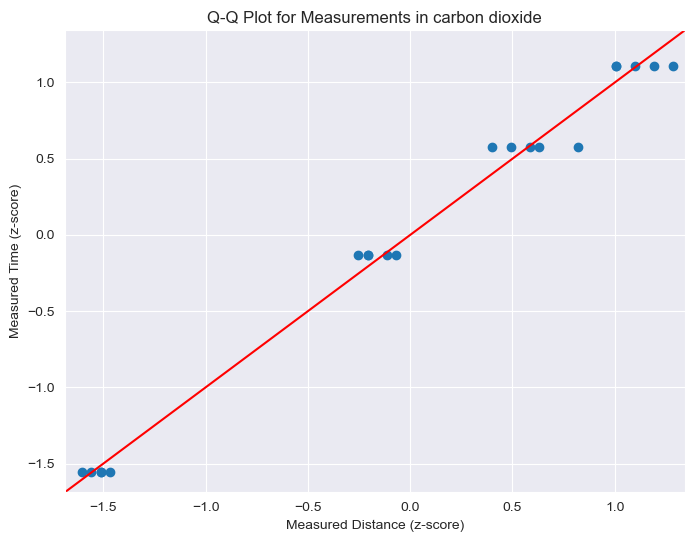

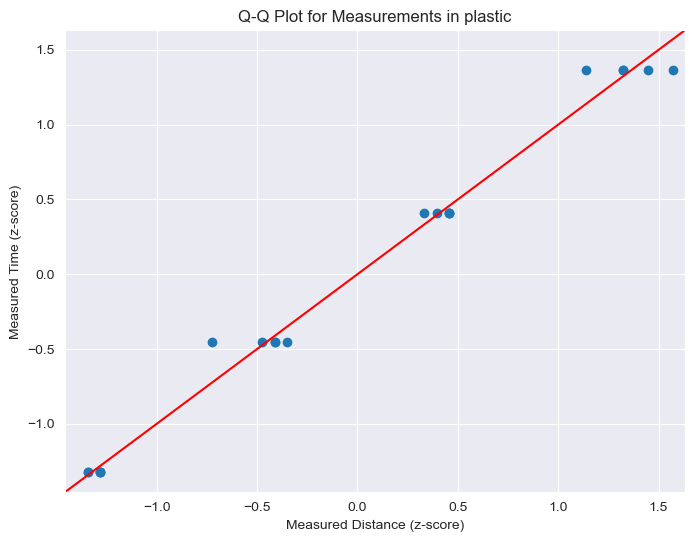

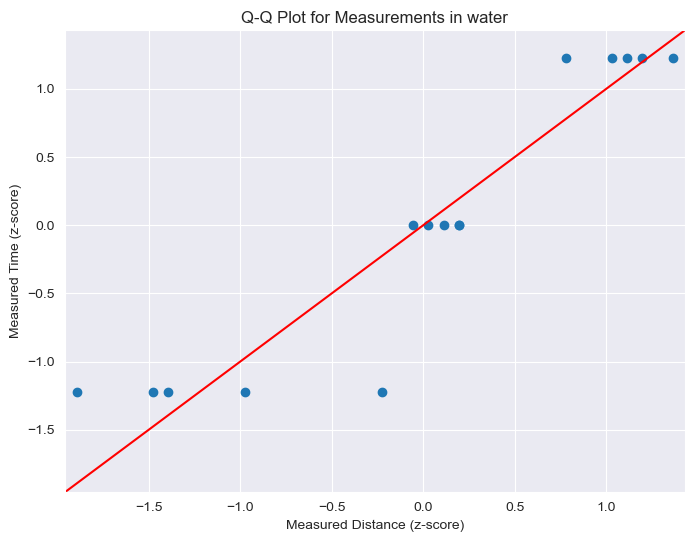

In [75]:
# List of materials to create Q-Q plots for
materials = df['material'].unique()
# Create separate Q-Q plots for each material
for material in materials:
    # Filter the data for the current material
    material_data = df[df['material'] == material]

    # Extract time and distance data
    time_data = material_data['time'].values
    distance_data = material_data['distance'].values

    # Create a Q-Q plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot_2samples(stats.zscore(time_data), stats.zscore(distance_data), ax=ax, line='45')
    ax.set_xlabel('Measured Distance (z-score)')
    ax.set_ylabel('Measured Time (z-score)')
    ax.set_title(f'Q-Q Plot for Measurements in {material}')
    plt.grid(True)
    plt.show()

<Figure size 800x600 with 0 Axes>

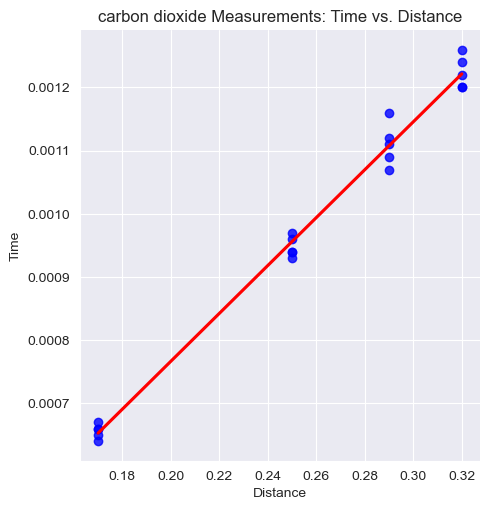

carbon dioxide Residuals (Deviations):
0     0.000052
1     0.000012
2     0.000002
3    -0.000038
4    -0.000018
5     0.000004
6    -0.000016
7    -0.000016
8    -0.000026
9     0.000014
10    0.000007
11   -0.000003
12   -0.000013
13    0.000007
14    0.000017
15    0.000038
16    0.000018
17   -0.000022
18   -0.000002
19   -0.000022
Name: time, dtype: float64


<Figure size 800x600 with 0 Axes>

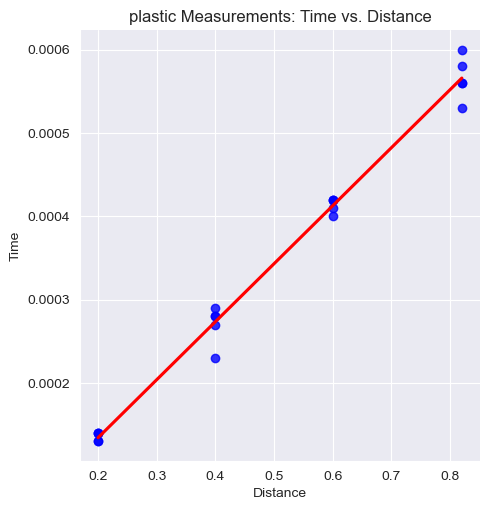

plastic Residuals (Deviations):
20   -0.000036
21   -0.000006
22    0.000014
23    0.000034
24   -0.000006
25    0.000007
26   -0.000003
27    0.000007
28   -0.000013
29    0.000007
30    0.000007
31   -0.000043
32    0.000007
33    0.000017
34   -0.000003
35   -0.000004
36    0.000006
37   -0.000004
38    0.000006
39    0.000006
Name: time, dtype: float64


<Figure size 800x600 with 0 Axes>

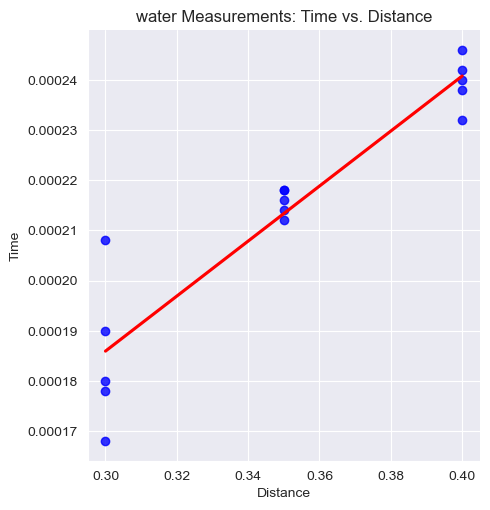

water Residuals (Deviations):
40    2.206667e-05
41   -1.793333e-05
42   -7.933333e-06
43   -5.933333e-06
44    4.066667e-06
45    6.666667e-07
46    4.666667e-06
47   -1.333333e-06
48    4.666667e-06
49    2.666667e-06
50   -7.333333e-07
51   -8.733333e-06
52    1.266667e-06
53   -2.733333e-06
54    5.266667e-06
Name: time, dtype: float64


In [73]:
# List of materials to create Q-Q plots for
materials = df['material'].unique()

# Create separate Q-Q plots for each material
for material in materials:
    # Filter the data for the current material
    material_data = df[df['material'] == material]

    # Extract the time and distance data for the material
    time_data = material_data['time']
    distance_data = material_data['distance']

    # Create a scatter plot with a regression line
    plt.figure(figsize=(8, 6))
    sns.lmplot(x='distance', y='time', data=material_data, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

    # Fit a linear regression model
    regression_model = LinearRegression()
    regression_model.fit(material_data[['distance']], material_data['time'])

    # Calculate residuals (deviations) of each data point from the regression line
    residuals = time_data - regression_model.predict(material_data[['distance']])

    # Set labels and title
    plt.xlabel('Distance')
    plt.ylabel('Time')
    plt.title(f'{material} Measurements: Time vs. Distance')

    plt.grid(True)
    plt.show()

    # Print residuals (deviations) for each data point
    print(f"{material} Residuals (Deviations):")
    print(residuals)

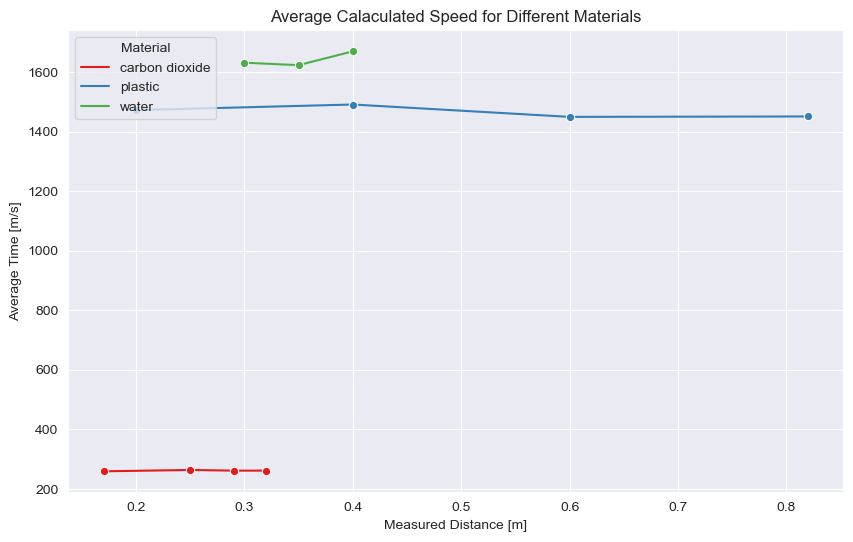

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn's lineplot to create the plot
sns.lineplot(data=averaged_df, x='distance', y='speed', hue='material', marker='o', palette='Set1')

# Set labels and title
plt.xlabel('Measured Distance [m]')
plt.ylabel('Average Time [m/s]')
plt.title('Average Calaculated Speed for Different Materials')

# Show legend
plt.legend(title="Material", loc="upper left")

# Show the plot
plt.grid(True)
plt.show()

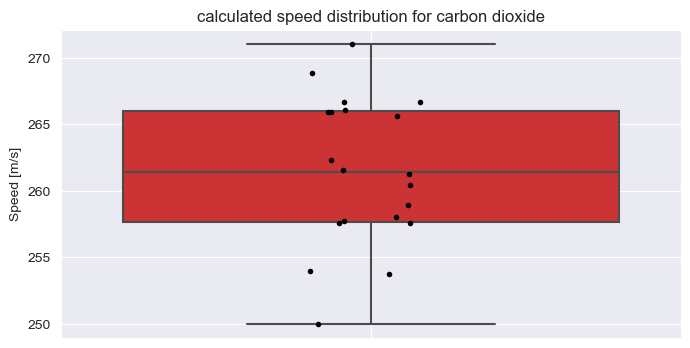

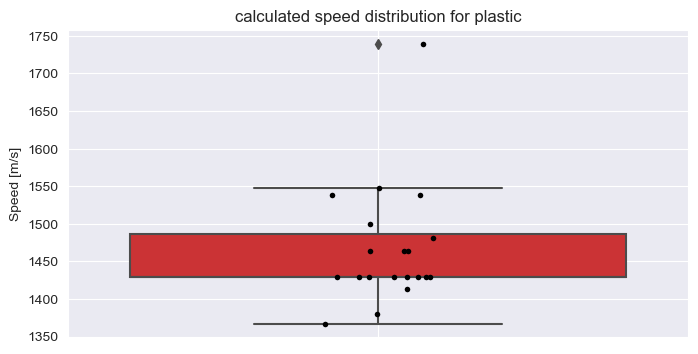

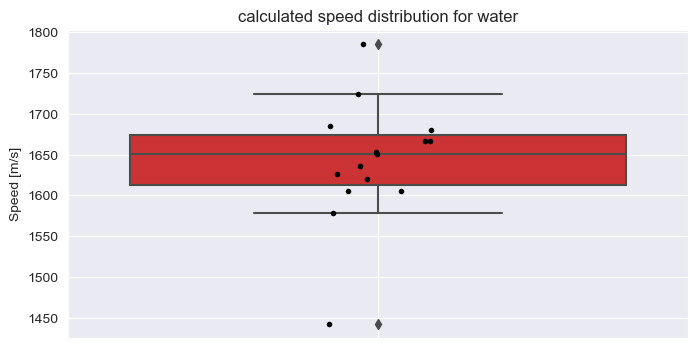

In [ ]:
# Get unique material values
materials = df['material'].unique()

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]
    
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    # Create a boxplot for the material
    sns.boxplot(data=material_df, y='speed', palette='Set1')
    
    # Add individual measurements as crosses (or points)
    sns.stripplot(data=material_df, y='speed', jitter=True, color='black', size=4)
    
    # Set labels and title
    plt.ylabel('Speed [m/s]')
    plt.title(f'calculated speed distribution for {material}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.grid(True)
    plt.show()


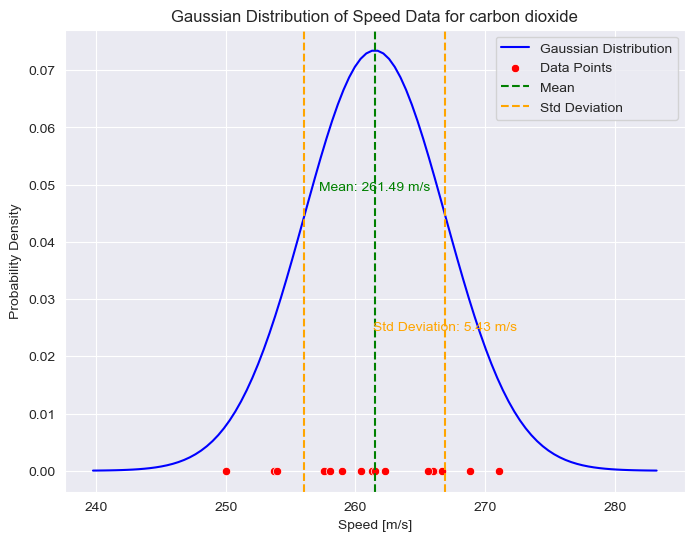

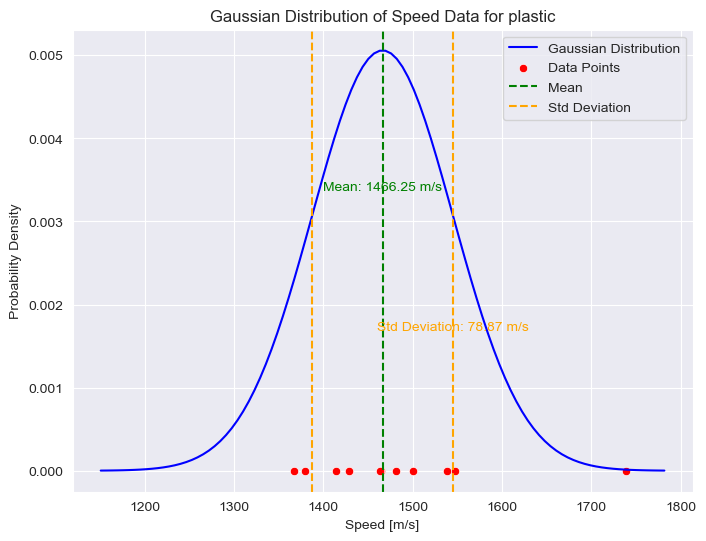

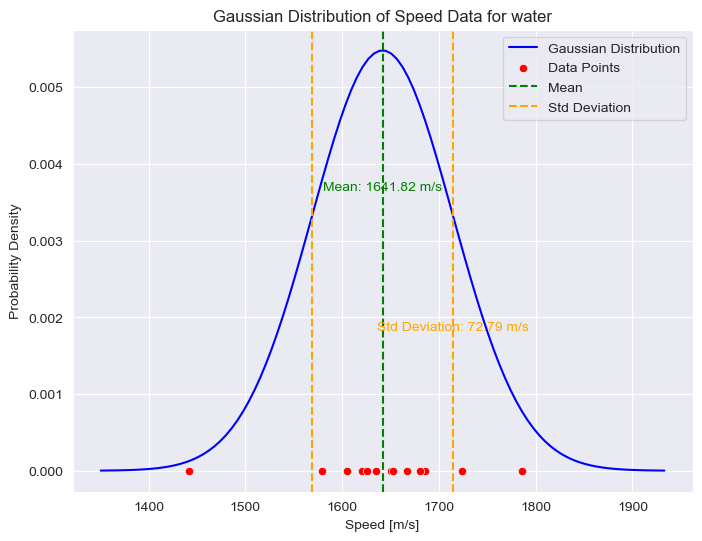

In [ ]:
# Get unique material values
materials = df['material'].unique()

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]

    # Extract speed data in microseconds
    speed_data = material_df['speed'].values

    # Calculate the mean and standard deviation of the speed data
    mean_speed = speed_data.mean()
    std_deviation_speed = speed_data.std(ddof=0)

    # Create a range of x values for the curve
    x = np.linspace(mean_speed - 4 * std_deviation_speed, mean_speed + 4 *std_deviation_speed, 100)

    # Create a Gaussian distribution (normal distribution) using the mean and standard deviation
    gaussian = norm.pdf(x, loc=mean_speed, scale=std_deviation_speed)
    
    # Plot the Gaussian distribution using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=x, y=gaussian, label='Gaussian Distribution', color='blue')

    # Add data points as a scatterplot
    sns.scatterplot(x=speed_data, y=0, label='Data Points', color='red', marker='o')  

    # Plot vertical lines for mean and standard deviation
    plt.axvline(mean_speed, color='green', linestyle='--', label='Mean')
    plt.axvline(mean_speed - std_deviation_speed, color='orange', linestyle='--', label='Std Deviation')
    plt.axvline(mean_speed + std_deviation_speed, color='orange', linestyle='--')

    # Add annotations for mean and standard deviation values
    upper_half = 2/3 * max(gaussian)
    lower_half = 1/3 * max(gaussian)
    plt.annotate(f'Mean: {mean_speed:.2f} m/s', xy=(mean_speed, upper_half), color='green', ha='center')
    plt.annotate(f'Std Deviation: {std_deviation_speed:.2f} m/s', xy=(mean_speed+std_deviation_speed, lower_half), color='orange', ha='center')

    plt.xlabel('Speed [m/s]')
    plt.ylabel('Probability Density')
    plt.title(f'Gaussian Distribution of Speed Data for {material}')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_12532\28200719.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()


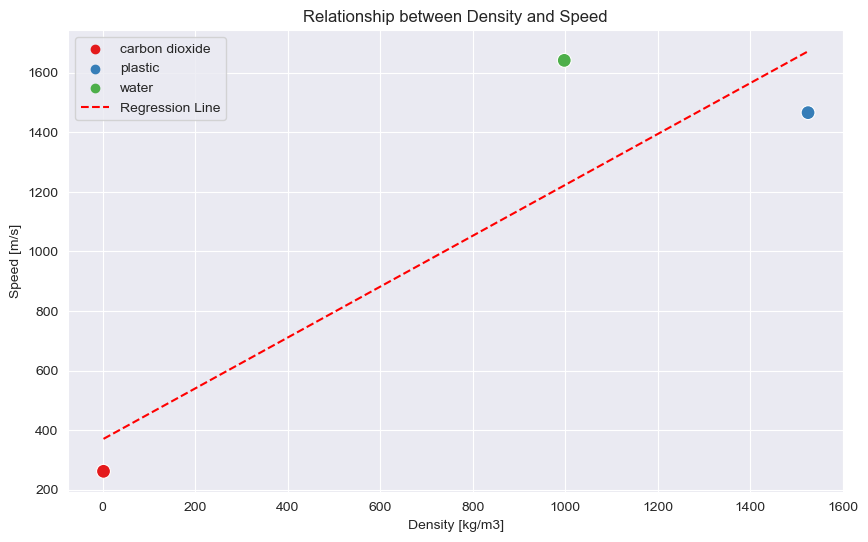

Regression Coefficients: Intercept = 368.9498167237365, Slope = 0.8547901337858723


In [77]:
# Create a scatterplot with regression line
plt.figure(figsize=(10, 6))
averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()
sns.scatterplot(data=averaged_material_df, x='density', y='speed', hue='material', palette='Set1', s=100)
plt.xlabel('Density [kg/m3]')
plt.ylabel('Speed [m/s]')
plt.title('Relationship between Density and Speed')

# Fit a linear regression model to the data points
X = df['density'].values.reshape(-1, 1)
y = df['speed'].values

regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
x_values = np.linspace(df['density'].min(), df['density'].max(), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, linestyle='--', color='red', label='Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print regression coefficients
print(f'Regression Coefficients: Intercept = {regressor.intercept_}, Slope = {regressor.coef_[0]}')